# Week 2


In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from utils import regression

plt.style.use("../../../../styles/deeplearning.mplstyle")

In [2]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, w_init type: {type(w_init)}")
print(f"w_init: {w_init}")
b_init = 785.1811367994083
print(f"b_init: {b_init}")

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]
w_init shape: (4,), w_init type: <class 'numpy.ndarray'>
w_init: [  0.39133535  18.75376741 -53.36032453 -26.42131618]
b_init: 785.1811367994083


## Linear Regression with multiple variables


Equations

$$
f_{\vec{w},b}(\vec{x}) = \vec{w} \cdot \vec{x} + b
$$

$$
f_{\vec{w},b}(\vec{x}) = (w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 \,\, ... \,\, w_nx_n) + b
$$

$$
f_{\vec{w},b}(\vec{x}) = (\sum \limits_{j=1}^{n} w_jx_j) + b
$$

where,

- $n = \text{number of features}$
- $\vec{x}^{(i)} = \text{features of } i^{th} \text{ training example}$


In [3]:
f_wb = regression.compute_regression_vectorized(w_init, b_init, X_train)
print(f"f_wb shape {f_wb.shape}, f_wb(X_train): {f_wb}")

f_wb shape (3,), f_wb(X_train): [459.99999762 231.99999837 177.99999899]


## Cost function


Equations

$$
J(\vec{w}, b) = \frac{1}{2m} \sum \limits_{i=1}^{m} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})^2
$$

where,

- $m = \text{number of training examples}$
- $f_{\vec{w},b}(\vec{x}^{(i)}) = \vec{w} \cdot \vec{x}^{(i)} + b$
- $y^{(i)} = \text{target value}$


In [4]:
# Compute and display cost using our pre-chosen optimal parameters.
cost = regression.compute_cost_vectorized(X_train, y_train, w_init, b_init)
print(f"Cost at optimal w : {cost}")

Cost at optimal w : 1.5578904045996674e-12


## Gradient Descent


Equations

$$
w_j = w_j - \alpha \frac{\partial J(\vec{w}, b)}{\partial w_j}
$$

$$
b = b - \alpha \frac{\partial J(\vec{w}, b)}{\partial b}
$$

$$
\frac{\partial J(\vec{w}, b)}{\partial w_j} = \frac{1}{m} \sum \limits_{i=1}^{m} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})x_j^{(i)}
$$

$$
\frac{\partial J(\vec{w}, b)}{\partial b} = \frac{1}{m} \sum \limits_{i=1}^{m} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})
$$

Therefore,

$\text{repeat: } \{$

$$
w_j = w_j - \alpha \frac{1}{m} \sum \limits_{i=1}^{m} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})x_j^{(i)}
$$

$$
b = b - \alpha \frac{1}{m} \sum \limits_{i=1}^{m} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})
$$

$\}$


In [5]:
# Compute and display gradient
tmp_dj_dw, tmp_dj_db = regression.compute_gradient_vectorized(
    X_train, y_train, w_init, b_init
)
print(f"dj_db at initial w,b: {tmp_dj_db}")
print(f"dj_dw at initial w,b: \n {tmp_dj_dw}")

dj_db at initial w,b: -1.6739251122999121e-06
dj_dw at initial w,b: 
 [-2.72623574e-03 -6.27197255e-06 -2.21745574e-06 -6.92403377e-05]


In [6]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.0
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent
w_final, b_final, J_hist = regression.gradient_descent_vectorized(
    X_train,
    y_train,
    initial_w,
    initial_b,
    alpha,
    iterations,
)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m, _ = X_train.shape
for i in range(m):
    print(
        f"prediction: {regression.predict_vectorized(w_final, b_final, X_train[i]):0.2f}, target value: {y_train[i]}"
    )

Iteration    0: Cost 2.53e+03 
Iteration  100: Cost 6.96e+02 
Iteration  200: Cost 6.95e+02 
Iteration  300: Cost 6.94e+02 
Iteration  400: Cost 6.93e+02 
Iteration  500: Cost 6.92e+02 
Iteration  600: Cost 6.91e+02 
Iteration  700: Cost 6.90e+02 
Iteration  800: Cost 6.89e+02 
Iteration  900: Cost 6.88e+02 
b,w found by gradient descent: -0.00,[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


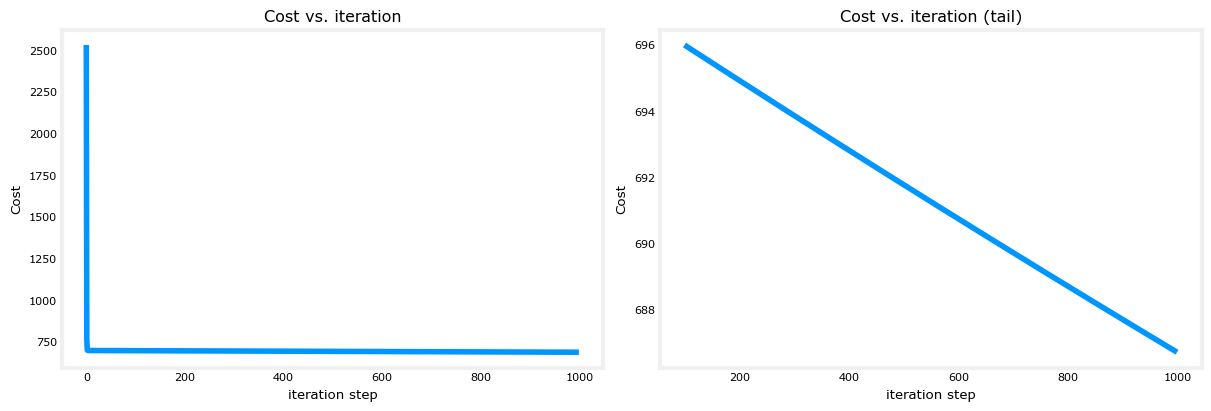

In [7]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration")
ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel("Cost")
ax2.set_ylabel("Cost")
ax1.set_xlabel("iteration step")
ax2.set_xlabel("iteration step")
plt.show()

> Gradient Descend is used to find the optimal weights which are used to get minimum error rate. In order to find the minimum error we can use the following approaches:
>
> - Minimize the $\alpha$ rate, to get optimal local minima.
> - Feature Scaling
>   - Feature scaling, essentially dividing each positive feature by its maximum value, or more generally, rescale each feature by both its minimum and maximum values using (x-min)/(max-min). Both ways normalizes features to the range of -1 and 1, where the former method works for positive features which is simple and serves well for the lecture's example, and the latter method works for any features.
> - Mean normalization: $x_i := \dfrac{x_i - \mu_i}{max - min} $
> - Z-score normalization:
>   - $$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j}$$
>     where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
>   - $$\mu_j = \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j$$
>   - $$\sigma^2_j = \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2$$
> - Feature Engineering


# Polynomial Regression

> It allows us to fit non-linear functions.


Iteration    0: Cost 7.33e+03 
Iteration 1000: Cost 2.25e-01 
Iteration 2000: Cost 2.23e-01 
Iteration 3000: Cost 2.21e-01 
Iteration 4000: Cost 2.19e-01 
Iteration 5000: Cost 2.17e-01 
Iteration 6000: Cost 2.15e-01 
Iteration 7000: Cost 2.13e-01 
Iteration 8000: Cost 2.11e-01 
Iteration 9000: Cost 2.09e-01 
w,b found by gradient descent: w: [1.00417494], b: 0.0490


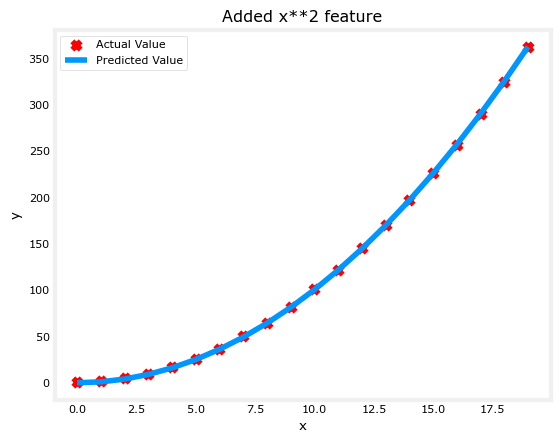

In [8]:
# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2

# Engineer features
X = x**2  # <-- added engineered feature

X = X.reshape(-1, 1)  # X should be a 2-D Matrix
model_w, model_b = regression.run_gradient_descent(X, y, iterations=10000, alpha=1e-5)

plt.scatter(x, y, marker="x", c="r", label="Actual Value")
plt.title("Added x**2 feature")
plt.plot(x, np.dot(X, model_w) + model_b, label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Complex Function


Iteration    0: Cost 2.20e-01 
Iteration 100000: Cost 1.70e-02 
Iteration 200000: Cost 1.70e-02 
Iteration 300000: Cost 1.70e-02 
Iteration 400000: Cost 1.70e-02 
Iteration 500000: Cost 1.70e-02 
Iteration 600000: Cost 1.70e-02 
Iteration 700000: Cost 1.70e-02 
Iteration 800000: Cost 1.70e-02 
Iteration 900000: Cost 1.70e-02 
w,b found by gradient descent: w: [ -1.33565562 -10.00231728  24.77799625   5.96170981 -12.48587921
 -16.26275994  -9.50807133   0.59194813   8.70295901  11.9412625
   9.27097351   0.78896901 -12.81745188], b: -0.0073


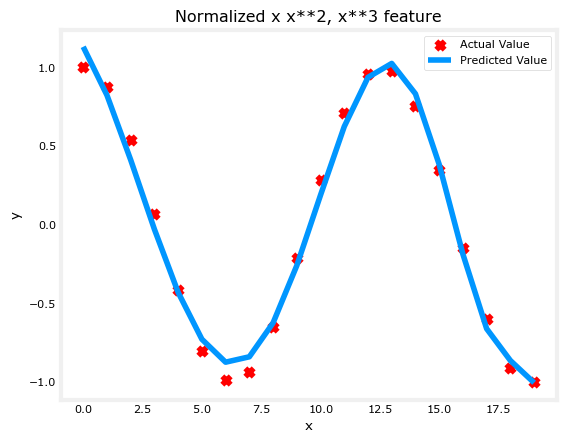

In [9]:
x = np.arange(0, 20, 1)
y = np.cos(x / 2)

X = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = regression.zscore_normalize_features(X)

model_w, model_b = regression.run_gradient_descent(X, y, iterations=1000000, alpha=1e-1)

plt.scatter(x, y, marker="x", c="r", label="Actual Value")
plt.title("Normalized x x**2, x**3 feature")
plt.plot(x, X @ model_w + model_b, label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Scikit-Learn


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=2)
plt.style.use("../../../../styles/deeplearning.mplstyle")


def load_house_data():
    data = np.loadtxt("../labs/data/houses.txt", delimiter=",", skiprows=1)
    X = data[:, :4]
    y = data[:, 4]
    return X, y

Load the data set


In [18]:
X_train, y_train = load_house_data()
X_features = ["size(sqft)", "bedrooms", "floors", "age"]

Scale/normalize the training data


In [19]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


Create and fit the regression model


In [20]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(
    f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}"
)

SGDRegressor()
number of iterations completed: 114, number of weight updates: 11287.0


View parameters


In [21]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print("model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [110.   -20.97 -32.36 -38.1 ], b:[363.13]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


Make predictions


In [22]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b.
y_pred = np.dot(X_norm, w_norm) + b_norm
print(
    f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}"
)

print(f"Prediction on training set:\n{y_pred[:4]}")
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.12 485.91 389.63 492.07]
Target values 
[300.  509.8 394.  540. ]


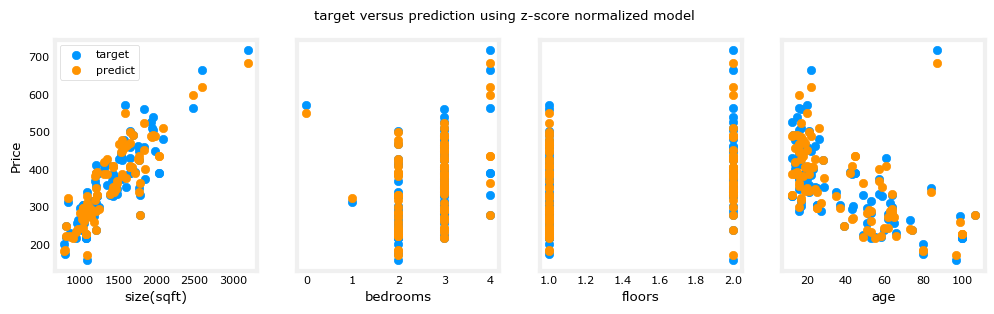

In [25]:
# plot predictions and targets vs original features
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, label="target")
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:, i], y_pred_sgd, color="#FF9300", label="predict")
ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()